<a href="https://colab.research.google.com/github/rsglick/drl/blob/master/notebooks/LLCv2_stable_baselines3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash

apt-get install -y xvfb x11-utils python-opengl swig cmake ffmpeg freeglut3-dev

pip install Box2D box2d-py box2d-kengz gym[box2d] gym[Box_2D]\
            pyvirtualdisplay\
            PyOpenGL\
            piglet\
            piglet-templates\
            PyOpenGL-accelerate\
            stable-baselines3[extra]

Reading package lists...
Building dependency tree...
Reading state information...
freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following additional packages will be installed:
  libxxf86dga1 swig3.0
Suggested packages:
  libgle3 swig-doc swig-examples swig3.0-examples swig3.0-doc mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 python-opengl swig swig3.0 x11-utils xvfb
0 upgraded, 6 newly installed, 0 to remove and 31 not upgraded.
Need to get 2,590 kB of archives.
After this operation, 14.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd

In [0]:
%matplotlib inline

In [0]:
import gym
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

import torch

from stable_baselines3 import PPO, SAC, TD3, A2C
from stable_baselines3.common.evaluation import evaluate_policy

from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.callbacks import StopTrainingOnRewardThreshold
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.callbacks import CallbackList

from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor

# Create Continous Gym Environment




In [0]:
# LunarLanderContinuous-v2
# MountainCarContinuous-v0
# Pendulum-v0

env_name = "LunarLanderContinuous-v2"
env = gym.make(env_name)

# reward_threshold = -200 # For Pendulum-v0
reward_threshold = 200 # LunarLanderContinuous-v2
total_timesteps = 3000000

log_dir = f"./gym/{env_name}"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)


eval_env = gym.make(env_name)
reward_threshold_callback = StopTrainingOnRewardThreshold(reward_threshold=reward_threshold, 
                                                          verbose=1)
checkpoint_callback = CheckpointCallback(save_freq=1000, 
                                         save_path=log_dir)
eval_callback = EvalCallback(eval_env, 
                             best_model_save_path=log_dir,
                             deterministic=True,
                             callback_on_new_best=reward_threshold_callback,
                             log_path=log_dir, 
                             verbose=1,
                             n_eval_episodes=5,
                             eval_freq=1000)
callback = CallbackList([checkpoint_callback, 
                         eval_callback])

# SAC

In [28]:
%%time

sac_hyperparams = {
    'learning_rate': 3.0e-4,
    'buffer_size': 1000000,
    'gamma': 0.99,
    'batch_size':256,
    'tau': 0.005,
    'device':'cuda',
}


modelSAC = SAC('MlpPolicy', 
               env, 
               **sac_hyperparams)

CPU times: user 18.7 ms, sys: 33.1 ms, total: 51.8 ms
Wall time: 53.3 ms


In [29]:
%%time
modelSAC.learn(total_timesteps=total_timesteps, 
               callback=callback)

# Save the agent
modelSAC.save(f"{log_dir}/modelSAC_{env_name}")
del modelSAC

Eval num_timesteps=1000, episode_reward=-229.77 +/- 74.39
Episode length: 259.80 +/- 92.92
New best mean reward!
Eval num_timesteps=2000, episode_reward=-193.68 +/- 53.27
Episode length: 385.20 +/- 89.33
New best mean reward!
Eval num_timesteps=3000, episode_reward=-214.00 +/- 89.38
Episode length: 714.20 +/- 216.37
Eval num_timesteps=4000, episode_reward=-215.84 +/- 23.51
Episode length: 535.40 +/- 128.10
Eval num_timesteps=5000, episode_reward=-144.22 +/- 59.06
Episode length: 983.00 +/- 34.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-85.10 +/- 11.57
Episode length: 1000.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-80.87 +/- 21.11
Episode length: 1000.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-130.99 +/- 18.21
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-72.64 +/- 15.92
Episode length: 1000.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=-58.94 +/

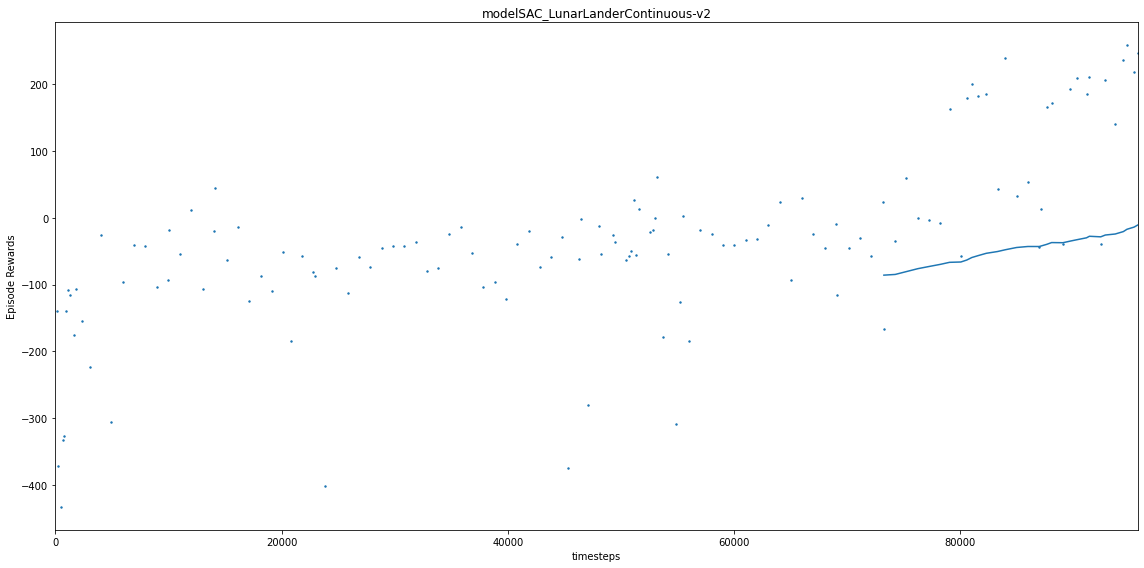

In [48]:
# Evaluate the trained agent
modelSAC = SAC.load(f"{log_dir}/modelSAC_{env_name}")

results_plotter.plot_results(dirs=[log_dir], 
                             num_timesteps=None,
                             x_axis=results_plotter.X_TIMESTEPS, 
                             task_name=f"modelSAC_{env_name}",
                             figsize=(16,8))

# PPO

In [49]:
%%time
modelPPO = PPO('MlpPolicy', env)
modelPPO.learn(total_timesteps=total_timesteps, 
               callback=callback)

# Save the agent
modelPPO.save(f"{log_dir}/modelPPO_{env_name}")
del modelPPO

Eval num_timesteps=1000, episode_reward=-126.19 +/- 21.46
Episode length: 75.20 +/- 13.09
Eval num_timesteps=2000, episode_reward=-144.36 +/- 43.00
Episode length: 72.60 +/- 11.72
Eval num_timesteps=3000, episode_reward=-143.52 +/- 13.70
Episode length: 63.60 +/- 11.00
Eval num_timesteps=4000, episode_reward=-150.50 +/- 28.04
Episode length: 73.00 +/- 11.51
Eval num_timesteps=5000, episode_reward=-163.62 +/- 48.84
Episode length: 72.80 +/- 7.44
Eval num_timesteps=6000, episode_reward=-129.85 +/- 27.98
Episode length: 74.40 +/- 12.88
Eval num_timesteps=7000, episode_reward=-183.52 +/- 105.01
Episode length: 109.00 +/- 17.81
Eval num_timesteps=8000, episode_reward=-115.58 +/- 88.69
Episode length: 78.80 +/- 18.02
Eval num_timesteps=9000, episode_reward=-177.77 +/- 80.74
Episode length: 81.40 +/- 17.43
Eval num_timesteps=10000, episode_reward=-82.68 +/- 33.79
Episode length: 83.40 +/- 13.76
Eval num_timesteps=11000, episode_reward=-129.88 +/- 105.60
Episode length: 114.80 +/- 14.08
Eval n

CPU times: user 102 ms, sys: 56.1 ms, total: 158 ms
Wall time: 94.2 ms


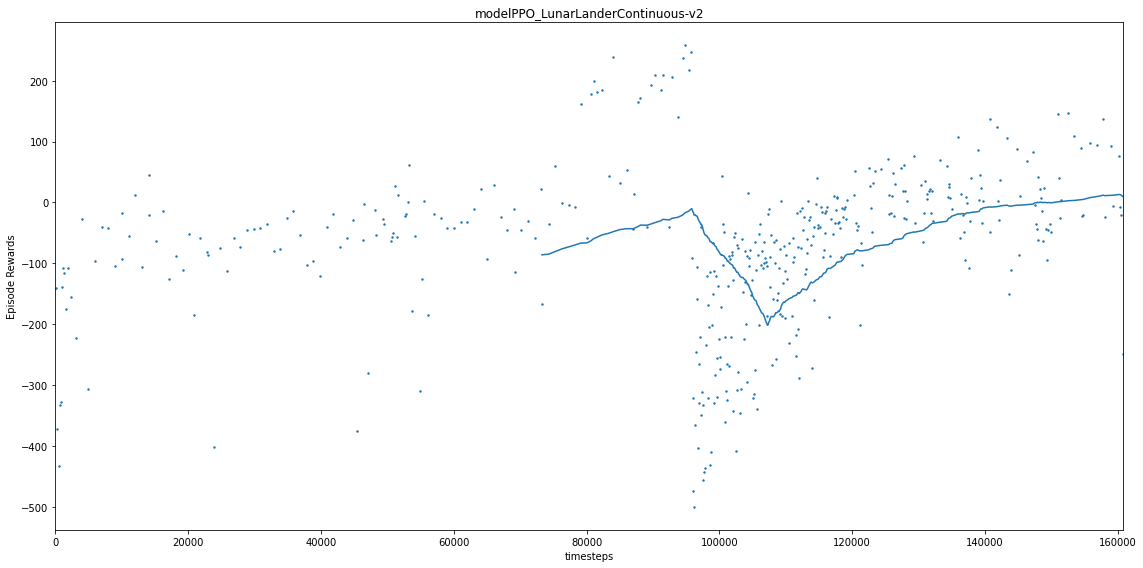

In [50]:
%%time
# Evaluate the trained agent
modelPPO = PPO.load(f"{log_dir}/modelPPO_{env_name}")

results_plotter.plot_results(dirs=[log_dir], 
                             num_timesteps=None,
                             x_axis=results_plotter.X_TIMESTEPS, 
                             task_name=f"modelPPO_{env_name}",
                             figsize=(16,8))

# TD3

In [51]:
%%time
modelTD3 = TD3('MlpPolicy', env)
modelTD3.learn(total_timesteps=total_timesteps, 
               callback=callback)

# Save the agent
modelTD3.save(f"{log_dir}/modelTD3_{env_name}")
del modelTD3

Eval num_timesteps=1000, episode_reward=-495.36 +/- 60.12
Episode length: 138.40 +/- 15.70
Eval num_timesteps=2000, episode_reward=-349.59 +/- 62.77
Episode length: 120.40 +/- 13.97
Eval num_timesteps=3000, episode_reward=-253.01 +/- 27.87
Episode length: 130.60 +/- 14.89
Eval num_timesteps=4000, episode_reward=-179.95 +/- 145.70
Episode length: 144.80 +/- 33.44
Eval num_timesteps=5000, episode_reward=-303.87 +/- 106.42
Episode length: 173.40 +/- 23.02
Eval num_timesteps=6000, episode_reward=-363.01 +/- 79.32
Episode length: 319.60 +/- 88.71
Eval num_timesteps=7000, episode_reward=-183.72 +/- 46.05
Episode length: 305.80 +/- 99.76
Eval num_timesteps=8000, episode_reward=-123.17 +/- 53.91
Episode length: 192.20 +/- 26.98
Eval num_timesteps=9000, episode_reward=-168.90 +/- 133.35
Episode length: 178.80 +/- 37.15
Eval num_timesteps=10000, episode_reward=-269.42 +/- 115.93
Episode length: 241.80 +/- 75.22
Eval num_timesteps=11000, episode_reward=-92.73 +/- 42.22
Episode length: 158.60 +/- 

CPU times: user 126 ms, sys: 105 ms, total: 231 ms
Wall time: 179 ms


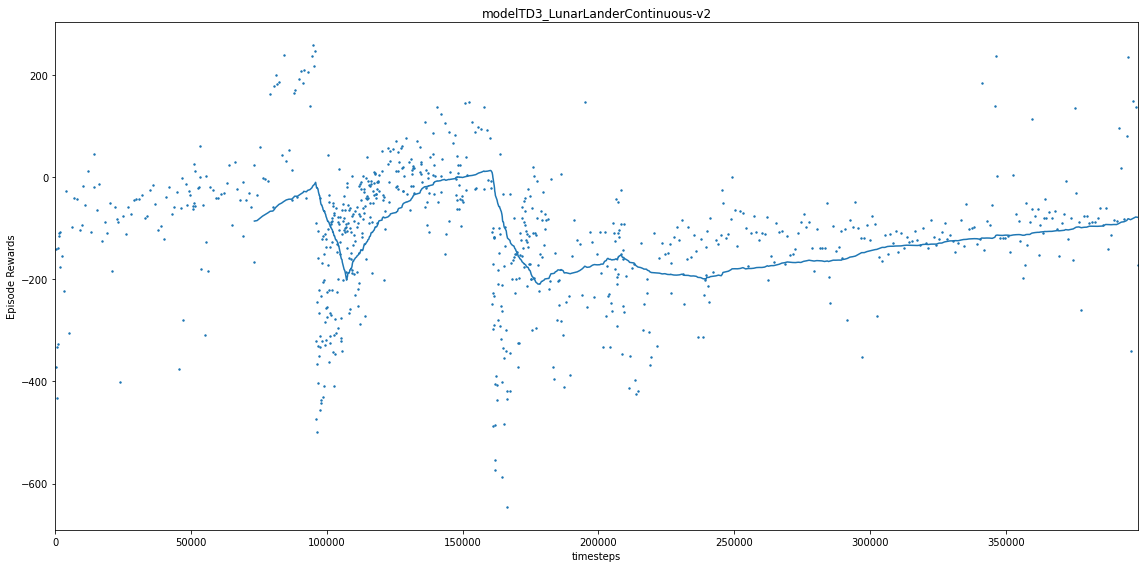

In [52]:
%%time
# Evaluate the trained agent
modelTD3 = TD3.load(f"{log_dir}/modelTD3_{env_name}")

results_plotter.plot_results(dirs=[log_dir], 
                             num_timesteps=None,
                             x_axis=results_plotter.X_TIMESTEPS, 
                             task_name=f"modelTD3_{env_name}",
                             figsize=(16,8))

# Record agents in action


In [0]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))


from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

In [53]:
#video_folder = f"{env_name}_output"
video_folder = log_dir

record_video(env_name, modelTD3, video_length=1000, prefix=f'td3_{env_name}', video_folder=video_folder)
record_video(env_name, modelPPO, video_length=1000, prefix=f'ppo_{env_name}', video_folder=video_folder)
record_video(env_name, modelSAC, video_length=1000, prefix=f'sac_{env_name}', video_folder=video_folder)

Saving video to  /content/gym/LunarLanderContinuous-v2/td3_LunarLanderContinuous-v2-step-0-to-step-1000.mp4
Saving video to  /content/gym/LunarLanderContinuous-v2/ppo_LunarLanderContinuous-v2-step-0-to-step-1000.mp4
Saving video to  /content/gym/LunarLanderContinuous-v2/sac_LunarLanderContinuous-v2-step-0-to-step-1000.mp4


In [54]:
show_videos(video_folder, prefix=f'sac_{env_name}')

In [55]:
show_videos(video_folder, prefix=f'td3_{env_name}')

In [56]:
show_videos(video_folder, prefix=f'ppo_{env_name}')

In [0]:
# os.system(f"mv modelPPO_{env_name}.zip {video_folder}")
# os.system(f"mv modelSAC_{env_name}.zip {video_folder}")
# os.system(f"mv modelTD3_{env_name}.zip {video_folder}")

0

In [57]:
os.system(f"tar -cvzf {video_folder}.tar.gz {video_folder}")

0

In [0]:
import time
time.sleep(30)

In [0]:
from google.colab import files
files.download(f'/content/{video_folder}.tar.gz')

In [0]:
%%bash
#rm -rf /content/*
ls -lh /content